# Constitution des bases de données 
Cette première cellule vous présente la manière avec laquelle j'ai obtenu les features/caractéristiques à partir des jeux de données de "textes"
Pour obtenir les textes (et les "filtrer") j'ai utiliser le script ./textDatasets/conversion.sh (qui prends, par exemple les fichiers FR_* les concatene, supprime les accents (en gardant les caracteres sans accents) et enfin transforme en minuscules).
J'ai utilisé les livres "open data" de la base du site Guttenberg Project (qui archive énormément de livres en texte, "txt" simples", tombés dans le domaine publique).

## Code réalisé par R. Cogranne

In [1]:
import numpy as np
import string
BlockSz=1000

# On procede de la même façon pour les differents languages
# Ouverture du fichier texte contenant les caracteres alphabetiques "brutes"
textGERMAN = open('../input/GERMAN')
# Lecture
DE=textGERMAN.read()
textGERMAN.close()
# Calcule du nombre de blocks (arrondi par defaut) de BlockSz caracteres
NbBlock=int(np.floor(len(DE)/BlockSz))
# Creation des tableaux de donnees textuelles et de features
DataDE=[]
FeaDE =[]
# Pour tous les indices de blocks ...
for index in range(NbBlock):
    # Exctraction des donnees texte du block
    DataDE.append(DE[index*BlockSz:(index+1)*BlockSz])
    # Comptage de chacun des caracteres
    countDE=[]
    for letter in string.ascii_lowercase:
        countDE.append(DataDE[index].count(letter))
    # Comptage de toutes les 26**2 paires de caracteres possibles
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countDE.append(DataDE[index].count(letter1+letter2))
    # Une fois le vecteur de décompte obtenu  .... on ajoute ce vecteur (contenant tous les decomptes) au tableaux des features
    FeaDE.append(countDE)

# On procede de la même façon pour les differents languages ....
textFRENCH = open('../input/FRENCH')
FR=textFRENCH.read()
textFRENCH.close()
NbBlock=int(np.floor(len(FR)/BlockSz))
DataFR=[]
FeaFR =[]
for index in range(NbBlock):
    DataFR.append(FR[index*BlockSz:(index+1)*BlockSz])
    countFR=[]
    for letter in string.ascii_lowercase:
        countFR.append(DataFR[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countFR.append(DataFR[index].count(letter1+letter2))
    FeaFR.append(countFR)

# On procede de la même façon pour les differents languages ....
textSPANISH = open('../input/SPANISH')
ES=textSPANISH.read()
textSPANISH.close()
NbBlock=int(np.floor(len(ES)/BlockSz))
DataES=[]
FeaES =[]
for index in range(NbBlock):
    DataES.append(ES[index*BlockSz:(index+1)*BlockSz])
    countES=[]
    for letter in string.ascii_lowercase:
        countES.append(DataES[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countES.append(DataES[index].count(letter1+letter2))
    FeaES.append(countES)

# On procede de la même façon pour les differents languages ....
textENGLISH = open('../input/ENGLISH')
EN=textENGLISH.read()
textENGLISH.close()
NbBlock=int(np.floor(len(EN)/BlockSz))
DataEN=[]
FeaEN =[]
for index in range(NbBlock):
    DataEN.append(EN[index*BlockSz:(index+1)*BlockSz])
    countEN=[]
    for letter in string.ascii_lowercase:
        countEN.append(DataEN[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countEN.append(DataEN[index].count(letter1+letter2))
    FeaEN.append(countEN)

In [2]:
# Ici on sauvegarde les caracteristiques, pour eviter de les recalculer à chaque fois ....
np.save('./FeaEN.npy', FeaEN)
np.save('./FeaFR.npy', FeaFR)
np.save('./FeaDE.npy', FeaDE)
np.save('./FeaES.npy', FeaES)

In [3]:
# ... On peut simplement les loader (et commenter les cellules precedentes)
FeaEN = np.load('./FeaEN.npy')
FeaFR = np.load('./FeaFR.npy')
FeaDE = np.load('./FeaDE.npy')
FeaES = np.load('./FeaES.npy')

In [4]:
# Pour plus de "facilier de manipulation" on trasforme les donnes en "matrice numpy" et on affiche la dimension de la base de donnees.
FeaDE = np.array(FeaDE)
print(FeaDE.shape)

FeaFR = np.array(FeaFR)
print(FeaFR.shape)

FeaES = np.array(FeaES)
print(FeaES.shape)

FeaEN = np.array(FeaEN)
print(FeaEN.shape)

(4329, 702)
(4116, 702)
(4321, 702)
(4209, 702)


## Refactorisation du code pour comprendre la constitution des données

### Librairies

In [5]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Découpage en fonctions

In [6]:
#Fonction Feature qui permet à partir d'un fichier de comptabiliser le nombre d'occurences d'un caractère, le nombre d'occurences de deux caractères
def GenerateFeature(filename, BlockSz=1000) :
    # Ouverture du fichier texte contenant les caracteres alphabetiques "brutes"
    textCountry = open(filename)
    # Lecture
    content=textCountry.read()
    textCountry.close()
    # Calcule du nombre de blocks (arrondi par defaut) de BlockSz caracteres
    NbBlock=int(np.floor(len(content)/BlockSz))
    # Creation des tableaux de donnees textuelles et de features
    Data=[]
    Fea =[]
    # Pour tous les indices de blocks ...
    for index in range(NbBlock):
        # Exctraction des donnees texte du block
        Data.append(content[index*BlockSz:(index+1)*BlockSz])
        # Comptage de chacun des caracteres
        countCaracter=[]
        for letter in string.ascii_lowercase:
            countCaracter.append(Data[index].count(letter))
        # Comptage de toutes les 26**2 paires de caracteres possibles
        for letter1 in string.ascii_lowercase:
            for letter2 in string.ascii_lowercase:
                countCaracter.append(Data[index].count(letter1+letter2))
        # Une fois le vecteur de décompte obtenu  .... on ajoute ce vecteur (contenant tous les decomptes) au tableaux des features
        Fea.append(countCaracter)
    return Fea

In [7]:
import os
#Permet de générer la matrix en fonction d'un fichier d'entrée ou d'un fichier numpy si le travail sur le texte a déjà été réalisé
def GenerateMatrix(filenameIn, fileConvertNpy, BlockSz=1000):
    if(os.path.exists(fileConvertNpy)):
        feature = np.load(fileConvertNpy)
        return np.array(feature)
    else :
        feature = GenerateFeature(filenameIn, BlockSz)
        np.save(fileConvertNpy, feature)
        return np.array(feature)

In [8]:
germanArray = GenerateMatrix('../input/GERMAN', './FeatureDE.npy')
print("Shape german : " +str(germanArray.shape))
frenchArray = GenerateMatrix('../input/FRENCH', './FeatureFR.npy')
print("Shape french : " +str(frenchArray.shape))
spanishArray = GenerateMatrix('../input/SPANISH', './FeatureSP.npy')
print("Shape spanish : " +str(spanishArray.shape))
englishArray = GenerateMatrix('../input/ENGLISH', './FeatureEN.npy')
print("Shape english : " +str(englishArray.shape))


Shape german : (4329, 702)
Shape french : (4116, 702)
Shape spanish : (4321, 702)
Shape english : (4209, 702)


In [9]:
print("Verification German Array : ", (germanArray - FeaDE).sum())
print("Verification French Array : ", (frenchArray - FeaFR).sum())
print("Verification Spanish Array : ", (spanishArray - FeaES).sum())
print("Verification English Array : ", (englishArray - FeaEN).sum())

Verification German Array :  0
Verification French Array :  0
Verification Spanish Array :  0
Verification English Array :  0


Le code permet de comptabiliser dans un ensemble de textes concaténées et nettoyées via Conversion.sln :
* le nombre de lignes correspond au découpage du fichier consolidé en block de 1000 caractères
* les 26 premières colonnes correspondent au nombre d'occurences sur la ligne du nombre de A, ..., Z
* les 26 colonnes suivantes correspondent au nombre d'occurences de la succession de caractères AA, AB, ..., AZ
* les 26 colonnes suivantes correspondent au nombre d'occurences de la succession de caractères BA, BB, ..., BZ
* ...
* les 26 dernières colonnes correspondent au nombre d'occurences de la succession de caractères ZA, ZB, ..., ZZ

On retrouve bien que le nombre de colonnes 26 + 26*26

### Construction Dataframe

Les dataframe Panda sont pratiques notamment pour avoir des colonnes associées à la matrice de données.

In [10]:
#Permet de construire la liste a, b, ...,z, aa, ..., az, ..., zz
def BuildListColumn():
    listColumn = []
    for letter in string.ascii_lowercase:
        listColumn.append(letter)
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            listColumn.append(letter1+letter2)
    return listColumn

In [11]:
def BuildDataFrame(data, listColumn):
    return pd.DataFrame(data, columns = listColumn)

In [12]:
listColumn = BuildListColumn()
df_spanish = BuildDataFrame(spanishArray,listColumn) 
df_german = BuildDataFrame(germanArray,listColumn)
df_french = BuildDataFrame(frenchArray,listColumn)
df_english = BuildDataFrame(englishArray,listColumn)

### Suppression des colonnes vides

On identifie par langue les colonnes où le caractère est nul sur l'intégralité des blocks.

In [13]:
frenchEmptyColumn = [ val for val in listColumn if df_french[val].sum()==0]
spanishEmptyColumn = [ val for val in listColumn if df_spanish[val].sum()==0]
englishEmptyColumn = [ val for val in listColumn if df_english[val].sum()==0]
germanEmptyColumn = [ val for val in listColumn if df_german[val].sum()==0]
print("Empty French Column : " + str(len(frenchEmptyColumn)))
print("Empty Spanish Column : " + str(len(spanishEmptyColumn)))
print("Empty English Column : " + str(len(englishEmptyColumn)))
print("Empty German Column : " + str(len(germanEmptyColumn)))

Empty French Column : 42
Empty Spanish Column : 58
Empty English Column : 58
Empty German Column : 28


On supprime ensuite en faisant l'intersection des colonnes vides pour l'ensemble des langues ce qui nous permet d'identifier une suite de caractères inutiles quelque soit la langue.

In [14]:
intersectionEmpty = set(frenchEmptyColumn).intersection(spanishEmptyColumn).intersection(englishEmptyColumn).intersection(germanEmptyColumn)
print("Drop Column : " + str(len(intersectionEmpty)))
intersectionEmpty
df_french.drop(intersectionEmpty, axis=1, inplace=True)
df_spanish.drop(intersectionEmpty, axis=1, inplace=True)
df_german.drop(intersectionEmpty, axis=1, inplace=True)
df_english.drop(intersectionEmpty, axis=1,inplace=True)

Drop Column : 6


Pour des optimisations ultérieures dans les comparaisons deux à deux des langues, on va mettre à jour la liste des colonnes vides de chaque langue

In [15]:
for colEmpty in intersectionEmpty:
    frenchEmptyColumn.remove(colEmpty)
    spanishEmptyColumn.remove(colEmpty)
    englishEmptyColumn.remove(colEmpty)
    germanEmptyColumn.remove(colEmpty)
print("Empty French Column after drop : " + str(len(frenchEmptyColumn)))
print("Empty Spanish Column after drop : " + str(len(spanishEmptyColumn)))
print("Empty English Column after drop : " + str(len(englishEmptyColumn)))
print("Empty German Column after drop : " + str(len(germanEmptyColumn)))

Empty French Column after drop : 36
Empty Spanish Column after drop : 52
Empty English Column after drop : 52
Empty German Column after drop : 22


# Classification linéaire à 2 classes

## Construction des ensembles X,y,Train et Test

### Ensemble X,y

On ajoute deux ensembles de features de deux langues et on construit la cible du modèle. Par convention, nous donnons 1 pour la première langue et -1 pour la seconde langue.

In [16]:
def BuildFeatureAndTarget(firstLang, secondLang):
    
    if(firstLang == "DE"):
        firstArray = df_german
        firstEmptyColumn = germanEmptyColumn
    elif(firstLang == "FR"):
        firstArray = df_french
        firstEmptyColumn = frenchEmptyColumn
    elif(firstLang == "SP"):
        firstArray = df_spanish
        firstEmptyColumn = spanishEmptyColumn
    else:
        firstArray = df_english
        firstEmptyColumn = englishEmptyColumn
    
    if(secondLang == "DE"):
        secondArray = df_german
        secondEmptyColumn = germanEmptyColumn
    elif(secondLang == "FR"):
        secondArray = df_french
        secondEmptyColumn = frenchEmptyColumn
    elif(secondLang == "SP"):
        secondArray = df_spanish
        secondEmptyColumn = spanishEmptyColumn
    else:
        secondArray = df_english
        secondEmptyColumn = englishEmptyColumn
    
    print("First Lang : "  + firstLang)
    print("Shape de First Lang : " + str(firstArray.shape))
    print("Second Lang : " + secondLang)
    print("Shape de Second Lang : " + str(secondArray.shape))
    
    X = pd.concat([firstArray,secondArray], ignore_index=True)
    intersectionEmpty = set(firstEmptyColumn).intersection(secondEmptyColumn)
    print("Drop Column : " + str(len(intersectionEmpty)))
    X.drop(intersectionEmpty, axis=1, inplace=True)

    targetFirst = np.array([1 for i in range(firstArray.shape[0])])
    targetSecond = np.array([-1 for i in range(secondArray.shape[0])])
    y = np.append(targetFirst,targetSecond, axis = 0)
    
    print("Shape de X : " + str(X.shape))
    print("Shape de y : " + str(y.shape))
    return(X,y)

In [17]:
X,y = BuildFeatureAndTarget("FR", "DE")

First Lang : FR
Shape de First Lang : (4116, 696)
Second Lang : DE
Shape de Second Lang : (4329, 696)
Drop Column : 1
Shape de X : (8445, 695)
Shape de y : (8445,)


### Séparation entre Train et Test

On prend 80% des données pour le train et 20% pour le test

In [18]:
#On split le dataset (permet également de shuffle)
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=123)
print("Taille de X_train : " + str(X_Train.shape))
print("Taille de y_Train : " + str(y_Train.shape))
print("Taille de X_test : " + str(X_Test.shape))
print("Taille de y_Test : " + str(y_Test.shape))



Taille de X_train : (6756, 695)
Taille de y_Train : (6756,)
Taille de X_test : (1689, 695)
Taille de y_Test : (1689,)


## Différentes méthodes de classification linéaires

### Régression linéaire Ridge

Le modèle Ridge est une régression linéaire introduisant en plus un terme de régularisation en Norme L2 sur le vecteur de pondération.

On effectue une recherche sur grille avec validation croisée sur l'ensemble de train pour identifier le meilleur paramètre alpha. Nous avons utilisé l'accuracy comme métrique car les classes sont équilibrées

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
# grille de valeurs
params = {"alpha": np.logspace(-5, 5, 11) } 
gridSearch_Ridge_CV = GridSearchCV(
    estimator = RidgeClassifier(),
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearch_Ridge_CV.fit(X_Train,y_Train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

On stocke les résultats dans un dataframe et on peut visualiser les résultats.

In [20]:
df_Rigde_CV_results = pd.DataFrame(gridSearch_Ridge_CV.cv_results_)
df_Rigde_CV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.449005,0.047216,0.019944,0.003938,1e-05,{'alpha': 1e-05},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997410,0.998150,0.997780,0.997706,0.000277
1,0.492882,0.062631,0.016155,0.002474,0.0001,{'alpha': 0.0001},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997410,0.998150,0.997780,0.997706,0.000277
2,0.488892,0.052363,0.019151,0.002312,0.001,{'alpha': 0.001},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997410,0.998150,0.997780,0.997706,0.000277
3,0.484502,0.014827,0.019948,0.002820,0.01,{'alpha': 0.01},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997410,0.998150,0.997780,0.997706,0.000277
4,0.544941,0.040408,0.017156,0.003052,0.1,{'alpha': 0.1},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997410,0.998150,0.997780,0.997706,0.000277
5,0.517811,0.073489,0.018152,0.003242,1,{'alpha': 1.0},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997410,0.998150,0.997780,0.997706,0.000277
6,0.484105,0.071284,0.017955,0.002958,10,{'alpha': 10.0},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997410,0.997225,0.997780,0.997595,0.997558,0.000216
7,0.541354,0.129557,0.019947,0.004369,100,{'alpha': 100.0},0.995562,0.99926,0.99926,0.995559,...,0.997188,0.001713,1,0.997779,0.997040,0.996855,0.997595,0.997410,0.997336,0.000343
8,0.562894,0.118164,0.018352,0.002052,1000,{'alpha': 1000.0},0.995562,0.99926,0.99852,0.995559,...,0.997040,0.001552,9,0.997779,0.996855,0.996855,0.997410,0.997225,0.997225,0.000351
9,0.474530,0.058166,0.016956,0.001669,10000,{'alpha': 10000.0},0.995562,0.99926,0.99852,0.995559,...,0.997040,0.001552,9,0.997409,0.996485,0.996670,0.997410,0.997225,0.997040,0.000388


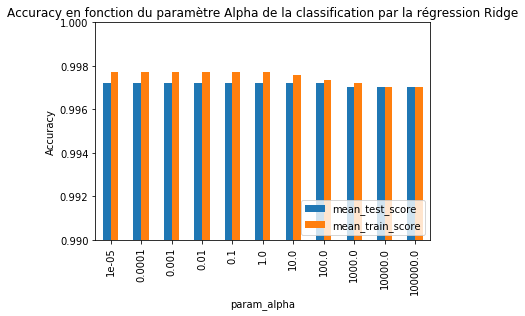

In [21]:
df_Rigde_CV_results.set_index(["param_alpha"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.99, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du paramètre Alpha de la classification par la régression Ridge")
plt.legend(loc="lower right")
plt.show()

In [22]:
print("Best Alpha parameter pour Ridge : ")
print(gridSearch_Ridge_CV.best_params_["alpha"])


Best Alpha parameter pour Ridge : 
1e-05


In [23]:
print("Score sur le test : ", gridSearch_Ridge_CV.score(X_Test,y_Test))

Score sur le test :  0.9988158673771462


On peut aussi afficher la matrice de confusion et retrouver la valeur de l'accuracy calculé ci-dessus

In [24]:
from sklearn.metrics import confusion_matrix
y_TestPredicted = gridSearch_Ridge_CV.predict(X_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[852,   2],
       [  0, 835]], dtype=int64)

### Régression linéaire Lasso

La régression linéaire Lasso est une alternative à Ridge en utilisant une régularisation L1 du vecteur de pondération. La conséquence de la régularisation Lasso est que certains coefficients valent exactement 0 et donc sont totalement ignorées par le modèle. 

Dans le cas de scikit Learn, nous n'avons pas trouvé de LassoClassifier. Nous allons implémenter la validation croisée et la recherche sur grille sur l'ensemble de train en utilisant la regressionLasso de Scikit Learn. 

In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
scores_lasso ={}
for regul in np.logspace(-5,5,11):
    clfLasso = Lasso(alpha=regul)
    scores_regul = []
    k=0
    for train_index, test_index in kf.split(X_Train):
        k=k+1
        X_train_k = X_Train.iloc[train_index,:]
        X_test_k  = X_Train.iloc[test_index,:]
        y_train_k = y_Train[train_index]
        y_test_k  = y_Train[test_index]
        clfLasso.fit(X_train_k, y_train_k)
        y_pred=clfLasso.predict(X_test_k)
        scores_tmp=( np.sum( y_pred[y_test_k==-1] > 0 ) + np.sum( y_pred[y_test_k==1] < 0 ) ) / y_pred.shape[0]
        scores_regul.append(scores_tmp)
    scores_lasso[regul] = np.mean(scores_regul) 
    print("Proba d'erreur moyenne =  " + str(scores_lasso[regul]) + " pour regul = " + str(regul) )

C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.10620680975843, tolerance: 0.5398136935603257
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.790111476495213, tolerance: 0.5395963737280293
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.99121009509802, tolerance: 0.540201591119334
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

Proba d'erreur moyenne =  0.0026643643323595494 pour regul = 1e-05


C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.38901738160385, tolerance: 0.5399262768319761
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.51393307985784, tolerance: 0.540142534690101
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.11297618709441, tolerance: 0.5400439592969473
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

Proba d'erreur moyenne =  0.0028124028223669518 pour regul = 0.0001


C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.452317373641876, tolerance: 0.5400475943745378
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.88453028279804, tolerance: 0.5400781498612399
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.88649594842646, tolerance: 0.5399590009250694
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

Proba d'erreur moyenne =  0.002960331816449792 pour regul = 0.001


C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0171977476212817, tolerance: 0.5398652109548481
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6839812807791645, tolerance: 0.5399590009250694
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7820382656232283, tolerance: 0.5400892506938024
  positive)
C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

Proba d'erreur moyenne =  0.0029603318164497915 pour regul = 0.01
Proba d'erreur moyenne =  0.0037003052746376773 pour regul = 0.1
Proba d'erreur moyenne =  0.004144530240584446 pour regul = 1.0
Proba d'erreur moyenne =  0.005180361686938012 pour regul = 10.0
Proba d'erreur moyenne =  0.4856439893307171 pour regul = 100.0
Proba d'erreur moyenne =  0.4856434418510943 pour regul = 1000.0
Proba d'erreur moyenne =  0.48564267537962236 pour regul = 10000.0
Proba d'erreur moyenne =  0.4856408139489048 pour regul = 100000.0


In [26]:
best_score = 1000
for regul,score in scores_lasso.items():
    if(score < best_score):
        best_score = score
        best_param = regul
print("Best Alpha parameter pour Lasso : " + str(best_param))

Best Alpha parameter pour Lasso : 1e-05


In [27]:
clfBestLasso = Lasso(alpha=best_param)
clfBestLasso.fit(X_Train,y_Train)
y_TestPredicted = clfBestLasso.predict(X_Test)
print("Nmobre de features utilisées avec le meilleur paramétrage : {}".format(np.sum(clfBestLasso.coef_ != 0)))

Nmobre de features utilisées avec le meilleur paramétrage : 659


C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.21394466551932, tolerance: 0.6750429248075782
  positive)


On peut regarder la matrice de confusion sur le test

In [28]:
y_TestClass = []
for val in y_TestPredicted :
    if(val<0):
        y_TestClass.append(-1)
    else:
        y_TestClass.append(1)

In [29]:
confusion_matrix(y_Test, y_TestClass)

array([[852,   2],
       [  0, 835]], dtype=int64)

La régression linéaire de type Lasso ou Ridge donne des résultats similaires

### SVM avec noyau linéaire

Nous utilions un séparateur à vaste marge avec un noyau linéaire pour séparer les 2 classes. On effectue une recherche sur grille avec validation croisée sur l'ensemble de train pour identifier le meilleur paramètre C. 

In [30]:
from sklearn.svm import SVC
# grille de valeurs
params = {"C": np.logspace(-5,5,11) } 
gridSearch_LinearSVM_CV = GridSearchCV(
    estimator = SVC(kernel='linear'),
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearch_LinearSVM_CV.fit(X_Train,y_Train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

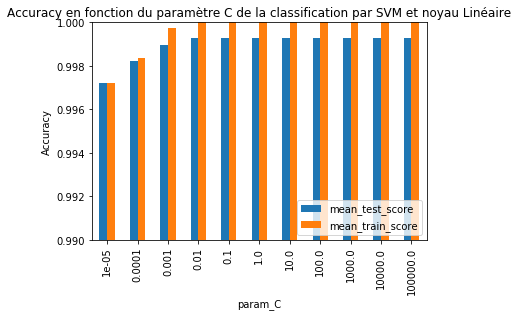

In [31]:
df_LinearSVM_CV_results = pd.DataFrame(gridSearch_LinearSVM_CV.cv_results_)
df_LinearSVM_CV_results.set_index(["param_C"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.99, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du paramètre C de la classification par SVM et noyau Linéaire")
plt.legend(loc="lower right")
plt.show()

In [32]:
print("Best C parameter pour SVM : ")
print(gridSearch_LinearSVM_CV.best_params_["C"])

Best C parameter pour SVM : 
0.01


In [33]:
print("Score sur le test : ", gridSearch_LinearSVM_CV.score(X_Test,y_Test))

Score sur le test :  1.0


In [34]:
y_TestPredicted = gridSearch_LinearSVM_CV.predict(X_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[854,   0],
       [  0, 835]], dtype=int64)

In [35]:
print("support vectors")
print(gridSearch_LinearSVM_CV.best_estimator_.support_vectors_)
print("\nNumber of support vectors for each class")
print(gridSearch_LinearSVM_CV.best_estimator_.n_support_)

support vectors
[[88. 17. 56. ...  0.  0.  0.]
 [78.  7. 25. ...  0.  0.  0.]
 [68. 13. 26. ...  0.  0.  0.]
 ...
 [92.  7. 15. ...  0.  0.  0.]
 [71.  3. 23. ...  0.  0.  0.]
 [75.  3. 37. ...  0.  0.  0.]]

Number of support vectors for each class
[13 48]


Le nombre de points séparateurs pour réaliser le SVM est une information intéressante car sont les points discriminants dans le cas de cette méthode

### Régression Logistique

La régression logistique est aussi une méthode adaptée et une extension de la régression linéiare pour réaliser de la classification en utilisant une fonction Logit

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# grille de valeurs
params = {"C": np.logspace(-5, 5, 11) } 
gridSearch_LogisticRegression_CV = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearch_LogisticRegression_CV.fit(X_Train,y_Train)

C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

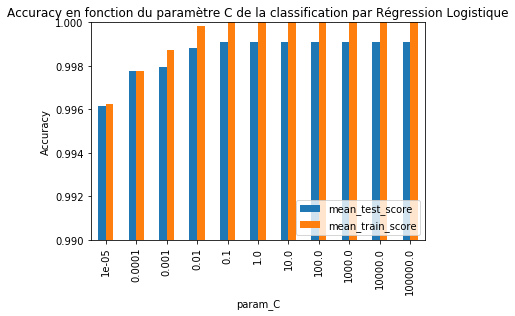

In [37]:
df_LogisticRegression_CV_results = pd.DataFrame(gridSearch_LogisticRegression_CV.cv_results_)
df_LogisticRegression_CV_results.set_index(["param_C"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.99, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du paramètre C de la classification par Régression Logistique")
plt.legend(loc="lower right")
plt.show()

In [38]:
print("Best C parameter pour Regression Logistique : ")
print(gridSearch_LogisticRegression_CV.best_params_["C"])

Best C parameter pour Regression Logistique : 
0.1


In [39]:
print("Score sur le test : ", gridSearch_LogisticRegression_CV.score(X_Test,y_Test))

Score sur le test :  0.9994079336885732


In [40]:
y_TestPredicted = gridSearch_LogisticRegression_CV.predict(X_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[853,   1],
       [  0, 835]], dtype=int64)

#### Conclusion

* La classification entre 2 langues est très bonne avec les différents modèles linéaires : Rigde, Lasso, SVM, Régression Logistique  
* En se basant sur les occurences des caractères, les modèles linéaires arrivent à discriminer 2 langues. 

### Réduction de la dimension

L'analyse en composantes principales est une méthode qui transforme des caractéristiques dites corrélées en caractéristiques non corrélées que l'on appelle composante principale exprimée comme une combinaison linéaire des features initiales. Cette phase est souvent suivi par la sélection d'un sous-ensemble des nouvelles caractéristiques, selon l'importance qu'elles présentent pour la compréhension des données. L'une des applications les plus courantes de la PCA est la visualisation de jeux de données multidimensionnels pour réduire le nombre de dimension dans un espace inférieur à 3 afin de le représenter.

#### Visualisation des données via PCA

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

#Normalisation des données : centrage et réduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Application de la PCA
pca = PCA(n_components=3, random_state=0)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print("Shape de départ : {}".format(str(X_scaled.shape)))
print("Shape après PCA : {}".format(str(X_pca.shape)))

Shape de départ : (8445, 695)
Shape après PCA : (8445, 3)


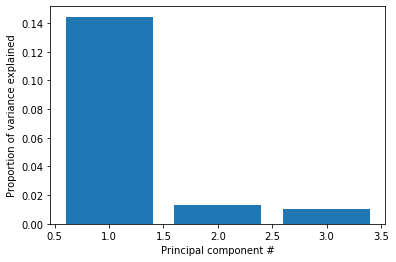

[0.14438991 0.0134324  0.01046494]


In [42]:
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.show()
print(pca.explained_variance_ratio_)

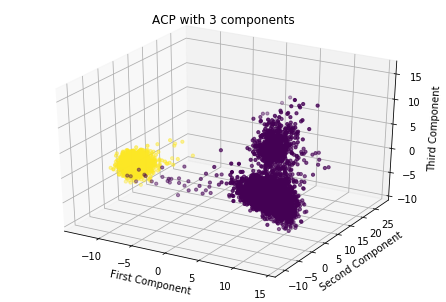

In [43]:
import matplotlib.pyplot as plt
# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
fig = pylab.figure(1)
ax = Axes3D(fig)
size_vertex_plot = 50
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], s=10, c=y)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
plt.title('ACP with 3 components') 
pyplot.show() 

La variance expliquée à travers les trois composantes principales est uniquement de 16% mais permet déjà de visualiser une séparation assez claire des 2 langues à travers la représentation graphique.

#### Modèle de régression logistique suite à une PCA

L'objectif est de voir la qualité d'une régression logistique suite à une réduction via PCA de la dimension initiale du problème.

In [44]:
scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train)

#Application de la PCA
pca = PCA(n_components=3, random_state=0)
pca.fit(X_Train_scaled)
X_pca_Train = pca.transform(X_Train_scaled)

# grille de valeurs
params = {"C": np.logspace(-5, 5, 11) } 
gridSearch_LogisticRegressionWithPCA_CV = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearch_LogisticRegressionWithPCA_CV.fit(X_pca_Train,y_Train)

C:\Users\bigdata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

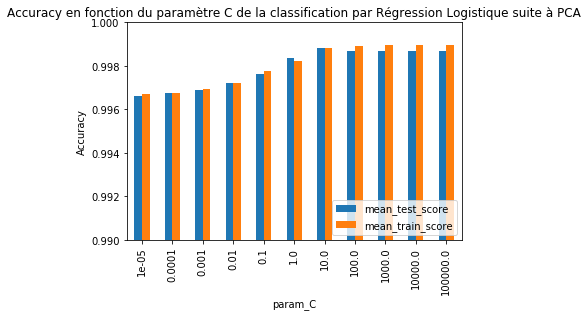

In [45]:
df_LogisticRegressionPCA_CV_results = pd.DataFrame(gridSearch_LogisticRegressionWithPCA_CV.cv_results_)
df_LogisticRegressionPCA_CV_results.set_index(["param_C"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.99, 1))
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du paramètre C de la classification par Régression Logistique suite à PCA")
plt.legend(loc="lower right")
plt.show()

In [46]:
print("Best C parameter pour Regression Logistique suite à PCA : ")
print(gridSearch_LogisticRegressionWithPCA_CV.best_params_["C"])

Best C parameter pour Regression Logistique suite à PCA : 
10.0


In [47]:
X_Test_scaled = scaler.transform(X_Test)
X_pca_Test = pca.transform(X_Test_scaled)
print("Score sur le test : ", gridSearch_LogisticRegressionWithPCA_CV.score(X_pca_Test,y_Test))

Score sur le test :  0.9994079336885732


In [48]:
y_TestPredicted = gridSearch_LogisticRegressionWithPCA_CV.predict(X_pca_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[853,   1],
       [  0, 835]], dtype=int64)

L'analyse en composante principale permet d'obtenir des résultats similaires par rapport à la dimension initiale du problème en prenant uniquement les 3 premières composantes principales. L'analyse graphique est confirmée par la classification suite à l'ACP.

## Méthode de classification non linéaire et réduction 

### Réduction de la dimension via KPCA

In [49]:
from sklearn.decomposition import KernelPCA

#Application de la PCA
kpca =  KernelPCA(kernel="rbf",n_components=3, random_state=0)
kpca.fit(X_scaled)
X_kpca = kpca.transform(X_scaled)

print("Shape de départ : {}".format(str(X_scaled.shape)))
print("Shape après KPCA : {}".format(str(X_kpca.shape)))

Shape de départ : (8445, 695)
Shape après KPCA : (8445, 3)


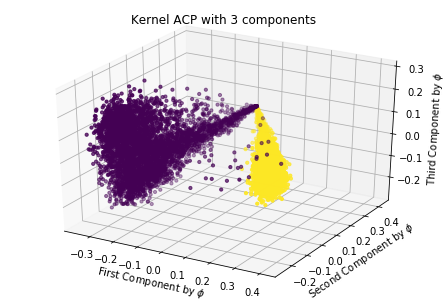

In [50]:
import matplotlib.pyplot as plt
# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
fig = pylab.figure(1)
ax = Axes3D(fig)
size_vertex_plot = 50
ax.scatter(X_kpca[:,0],X_kpca[:,1],X_kpca[:,2], s=10, c=y)
ax.set_xlabel('First Component by $\phi$')
ax.set_ylabel('Second Component by $\phi$')
ax.set_zlabel('Third Component by $\phi$')
plt.title('Kernel ACP with 3 components') 
pyplot.show() 

KPCA permet déjà de visualiser une séparation assez claire des 2 langues à travers la représentation graphique.

### Modèle SVM Gaussien suite à KCPA

Nous avons deux hyperparamètres à optimiser $C$ et $gamma$ que nous réalisons à travers une validation croisée et une recherche sur grille.

In [51]:
#Application de KPCA avec noyau gaussien et 3 composantes
kpca = KernelPCA(kernel="rbf",n_components=3, random_state=0)
kpca.fit(X_Train_scaled)
X_kpca_Train = kpca.transform(X_Train_scaled)

# grille de valeurs
params = {"C": np.logspace(-5, 5, 11), "gamma":np.logspace(-5, 5, 11) } 
gridSearch_SVMGaussienWithKPCA_CV = GridSearchCV(
    estimator = SVC(kernel='rbf'),
    param_grid= params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearch_SVMGaussienWithKPCA_CV.fit(X_kpca_Train,y_Train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                         'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [52]:
print("Best parameters pour SVM Gaussien suite à KPCA : ")
print(gridSearch_SVMGaussienWithKPCA_CV.best_params_)

Best parameters pour SVM Gaussien suite à KPCA : 
{'C': 1000.0, 'gamma': 100.0}


In [53]:
X_kpca_Test = kpca.transform(X_Test_scaled)
print("Score sur le test : ", gridSearch_SVMGaussienWithKPCA_CV.score(X_kpca_Test,y_Test))

Score sur le test :  0.9976317347542925


In [54]:
y_TestPredicted = gridSearch_SVMGaussienWithKPCA_CV.predict(X_kpca_Test)
confusion_matrix(y_Test, y_TestPredicted)

array([[853,   1],
       [  3, 832]], dtype=int64)

On arrive à une bonne classification via la méthode non linéaire SVM en utilisant le noyau gaussien en réduisant l'espace de départ via KPCA. Néanmoins, l'intérêt d'une approche non-linéaire ne semble pas à privilégier par rapport à une approche linéaire car les résultats sont sensiblement identiques et l'approche linéaire est plus simple mathématiquement et le temps de calcul est aussi bien moindre (j'ai essayé avant KCPA de faire un SVM avec noyau gaussien en optimisant les hyperparamètres sur la matrice de données initiales et j'ai abandonné à la vue du temps de calcul).

# Classification à N Classes